# Transformada de Fourier de tempo discreto

Renato Naville Watanabe

## Preparação do ambiente

In [1]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy.plotting import PlotGrid
%matplotlib widget

## Definição


A definição da Transformada de Fourier de tempo discreto é:

$X(e^{j\omega}) = \displaystyle\sum_{n=-\infty}^\infty x[n]e^{-j\omega n}$


A transformada de Fourier é indicada pelo operador $\mathcal{F}$.

$\mathcal{F}(x[n]) = \displaystyle\sum_{n=-\infty}^\infty x[n]e^{-j\omega n}$


A transformada de Fourier de um sinal é conhecida como o **espectro** do sinal.

Diferentemente da série de Fourier, é possível calcular a Transformada de Fourier para qualquer sinal:

---

### Exemplo 1

Vamos calcular a transformada de Fourier de tempo discreto de:

$x[n] = \left(\frac{1}{2}\right)^n u[n]$

$X(e^{j\omega}) = \displaystyle\sum_{n=-\infty}^\infty \left(\frac{1}{2}\right)^n u[n]e^{-j\omega n} = \displaystyle\sum_{n=0}^\infty \left(\frac{1}{2}\right)^ne^{-j\omega n} = \displaystyle\sum_{n=0}^\infty \left(\frac{e^{-j\omega}}{2}\right)^n=\frac{1}{1-\frac{e^{-j\omega}}{2}}=\frac{2}{2-e^{-j\omega}}$

O módulo de $X(e^{j\omega})$ é:

$|X(e^{j\omega})| = \left|\frac{2}{2-e^{-j\omega}} \right|= \left|\frac{2}{2-\cos(\omega)+j\mathrm{sen}(\omega)} \right|=\frac{2}{\sqrt{4-4\cos(\omega)+\cos^2(\omega)+\mathrm{sen}^2(\omega)}}=\frac{2}{\sqrt{5-4\cos(\omega)}}$

e a fase é:

$\angle{X(e^{j\omega})} = 0 - \arctan(\frac{\mathrm{sen}(\omega)}{2-\cos(\omega)}) = \arctan(\frac{\mathrm{sen}(\omega)}{\cos(\omega)-2}) $

Podemos fazer o gráfico do módulo e da fase de $X(e^{j\omega})$.

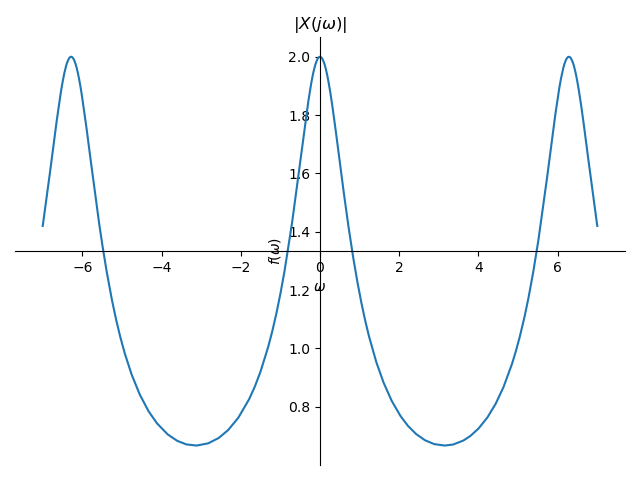

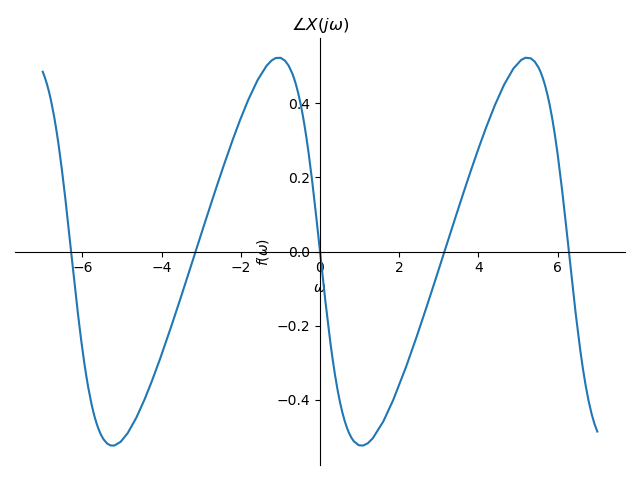

In [3]:
omega = sym.symbols('\omega')

sym.plot(2/sym.sqrt(5-4*sym.cos(omega)), (omega, -7, 7), title=r'$|X(j\omega)|$')
sym.plot(sym.atan(sym.sin(omega)/(sym.cos(omega)-2)), (omega, -7, 7), title=r'$\angle{X(j\omega)}$')

---

---

### Exemplo 2

Agora vamos calcular a transformada de Fourier de:

$x[n] = \delta[n-n_0]$

A transformada de Fourier é:


$X(e^{j\omega}) = \displaystyle\sum_{n=-\infty}^\infty \delta[n-n_0]e^{-j\omega n} = e^{-j\omega n_0} $

O módulo e fase de $X(e^{j\omega})$ são:

$|X(e^{j\omega})| = 1$

$\angle{X(e^{j\omega})} = -\omega n_0$

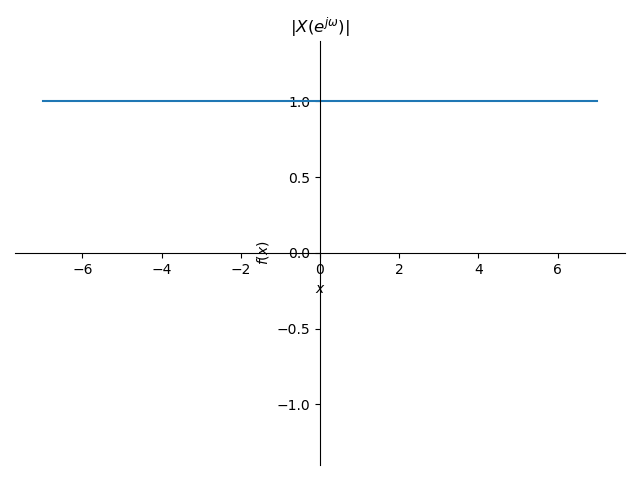

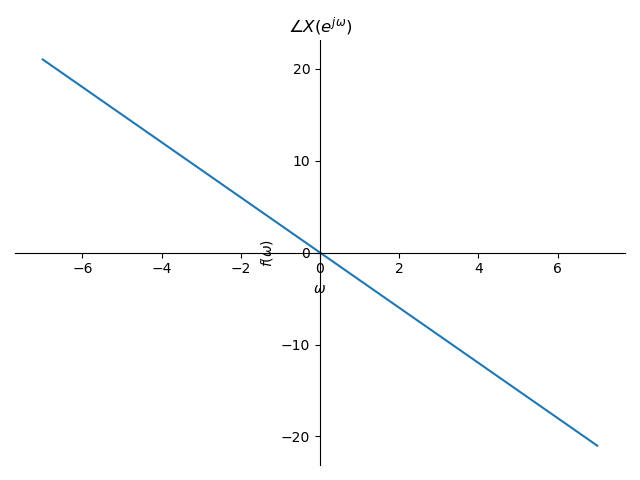

In [4]:
omega = sym.symbols('\omega')
n0 = 3
sym.plot(1+0*omega, (omega, -7, 7), title=r'$|X(e^{j\omega})|$', axis_center='center',ylim=(-1.4,1.4))
sym.plot(-omega*n0, (omega, -7, 7), title=r'$\angle{X(e^{j\omega})}$')

---

---

### Exemplo 3

Vamos calcular a transformada de Fourier de:

$x[n] = Au\left[n+N\right] - Au\left[n-(N+1)\right]$

A transformada de Fourier desse sinal é:

$X(e^{j\omega}) = \displaystyle\sum_{n=-\infty}^{\infty} A(u\left[n+N\right] - u\left[n-(N+1)\right])e^{-j\omega n} =  A\displaystyle\sum_{n=-N}^{N} e^{-j\omega n}=e^{-j\omega N}\left(\frac{1-e^{-j\omega (2N+1)}}{1-e^{-j\omega}} \right)$

$X(e^{j\omega}) = Ae^{-j\omega N}\left(\frac{e^{j\frac{\omega (2N+1)}{2}}-e^{-j\frac{\omega (2N+1)}{2}}}{e^{j\frac{\omega}{2}}-e^{-j\frac{\omega}{2}}} \right)e^{-j\frac{\omega (2N+1)}{2}}e^{j\frac{\omega}{2}}=A\frac{\mathrm{sen}\left(\frac{\omega (2N+1)}{2}\right)}{\mathrm{sen}(\frac{\omega}{2})}$



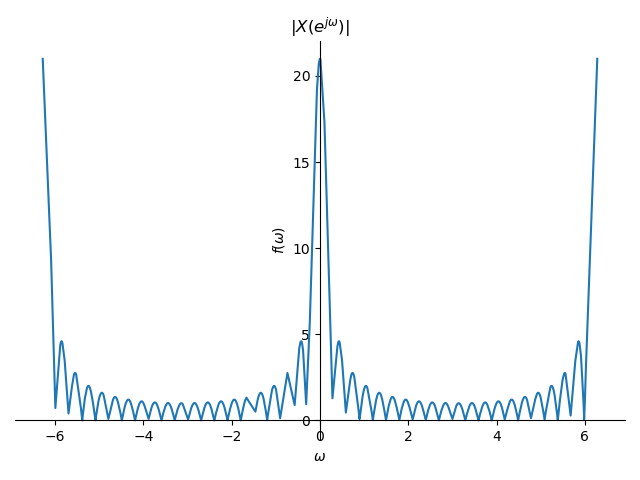

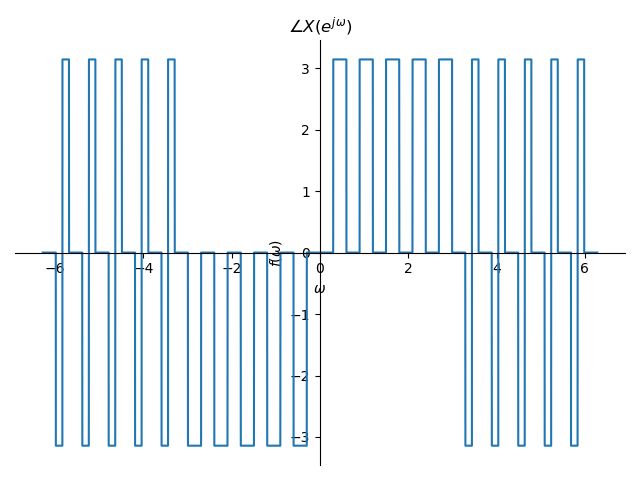

In [5]:
omega = sym.symbols('\omega')
N = 10
sym.plot(sym.Abs(sym.sin((2*N+1)/2*omega)/sym.sin(omega/2)), (omega, -6.28, 6.28),  title=r'$|X(e^{j\omega})|$')
sym.plot(sym.arg(sym.sin((2*N+1)/2*omega)/sym.sin(omega/2)), (omega, -6.28, 6.28), title=r'$\angle{X(e^{j\omega})}$')

## O sinal rect

O sinal que apareceu no exemplo anterior, e  com frequência é o pulso retangular. Então, definimos o pulso retangular como:

$\mathrm{rect}[n] = u[n+1] - u[n-2]$

A função acima é um pulso retangular de amplitude 1 e duração 3, centrada em 0.

Abaixo está o gráfico de $A\mathrm{rect}\left[\frac{n}{N}\right]$, com $N=10$.

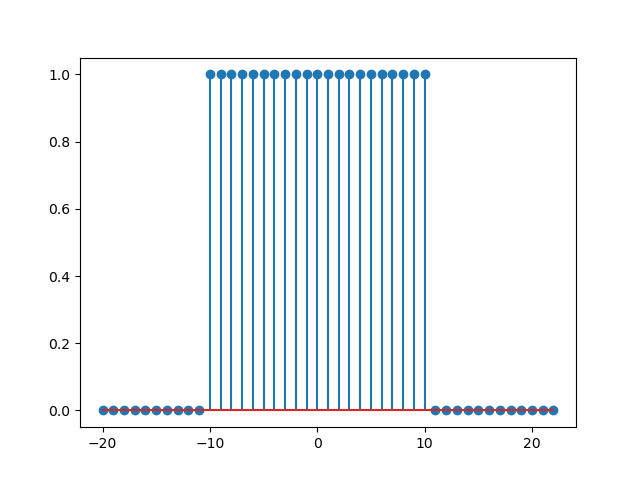

In [6]:
N = 10
n = np.arange(-20, 23)
x = np.zeros(len(n))
x[10:31] = 1
plt.figure()
plt.stem(n, x)
plt.show()

## Transformada de Fourier inversa

A partir da expressão de uma transformada de Fourier, podemos voltar ao sinal que deu origem àquela transformada pela seguinte expressão:

$\mathcal{F}^{-1}(X(e^{j\omega})) = \displaystyle\frac{1}{2\pi}\int_{<2\pi>} X(e^{j\omega})e^{j\omega n}\,d\omega$




---

### Exemplo 4

Vamos obter o sinal $x[n]$ que deu origem a:

$X(e^{j\omega}) = 2\pi\displaystyle\sum_{k=-\infty}^\infty \delta(\omega-2\pi k)$

Então,

$x[n] = \frac{1}{2\pi}\int_{-\pi}^\pi 2\pi\displaystyle\sum_{k=-\infty}^\infty \delta(\omega-2\pi k)e^{j\omega n}\,d\omega = \int_{-\pi}^\pi \delta(\omega)\,d\omega  = 1$


Ou seja, a transformada de Fourier do sinal constante é um trem de impulsos com os impulsos em $\omega=2\pi k$, $k\in \mathcal{Z}$.

---

Seria muito difícil fazer a transformada de Fourier do sinal constante. É mais fácil fazer a operação inversa. 

---

### Exemplo 5

Agora, vamos obter o sinal $x[n]$ que deu origem a:

$X(e^{j\omega}) = 2\pi\displaystyle\sum_{k=-\infty}^\infty \delta(\omega-\omega_0-2\pi k)$

Então,

$x[n] = \frac{1}{2\pi}\int_{-\pi}^\pi 2\pi\displaystyle\sum_{k=-\infty}^\infty \delta(\omega-\omega_0-2\pi k)e^{j\omega n}\,d\omega = \int_{-\pi}^\pi \delta(\omega-\omega_0)e^{j\omega n}\,d\omega  = \int_{-\pi}^\pi \delta(\omega-\omega_0)e^{j\omega_0 n}\,d\omega =  e^{j\omega_0 n}$

Ou seja, a transformada de Fourier de  exponencial complexa é um trem de impulsos com os impulsos em $\omega=\omega_0+2\pi k$, $k\in \mathcal{Z}$.

---

---

### Exemplo 6

Agora vamos obter a resposta ao impulso $h[n]$ do sistema correspondente ao filtro passa-baixa com frequência de corte $\omega_0$:

$H(e^{j\omega}) = \left\{\begin{array}{cc}1 &, |\omega|<\omega_0 \\ 0 & , \omega_0\leq|\omega|<\pi \\ H(e^{j(\omega-2\pi)})&,\forall \omega\end{array}\right.$

O sinal é:

$h[n] = \frac{1}{2\pi}\int_{-\pi}^\pi H(e^{j\omega})e^{j\omega n}d\omega = \frac{1}{2\pi}\int_{-\omega_0}^{\omega_0} e^{j\omega n}d\omega = \frac{1}{2\pi}\left.\frac{e^{j\omega n}}{jn}\right|_{\omega=-\omega_0}^{\omega_0}=\frac{1}{2\pi} \frac{e^{j\omega_0 n}-e^{-j\omega_0 n}}{jn}=\frac{\mathrm{sen}(\omega_0 n)}{\pi n}$ 

---

/tmp/ipykernel_79229/1602843522.py:3: RuntimeWarning: invalid value encountered in divide
  h = np.sin(omega0*n)/(np.pi*n)


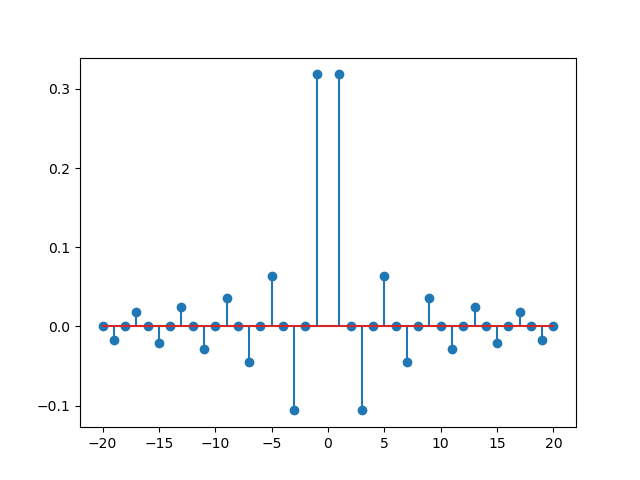

In [7]:
omega0 = np.pi/2
n = np.arange(-20, 21)
h = np.sin(omega0*n)/(np.pi*n)
plt.figure()
plt.stem(n, h)
plt.show()

A resposta ao impulso do filtro ideal começa em $t=-\infty$. Isso faz com que o sistema seja não-causal e por isso o filtro ideal é não realizável.

---

## Linearidade da transformada de Fourier

A transformada de Fourier é uma operação linear. Isso significa que se

$\mathcal{F}(x_1(t)) = X_1(e^{j\omega})$ e $\mathcal{F}(x_2(t)) = X_2(e^{j\omega})$

então:

$\boxed{\mathcal{\mathcal{F}}(ax_1(t)+bx_2(t)) = aX_1(e^{j\omega})+bX_2(e^{j\omega})}$

---

### Exemplo 7

Vamos calcular a transformada de Fourier de

$x[t] = \cos(3n)$

Podemos reescrever $x[n]$ como:

$x[n] = \frac{e^{j3n}+e^{-j3n}}{2}$


Pela propriedade da linearidade:

$X(e^{j\omega}) = \frac{1}{2}\mathcal{F}(e^{j3n})+ \frac{1}{2}\mathcal{F}(e^{-j3n})$

No exemplo 5, vimos que $\mathcal{F}(e^{j\omega_0 n}) = 2\pi\displaystyle\sum_{k=-\infty}^\infty\delta(\omega-\omega_0-2\pi k)$. 

Então

$X(e^{j\omega}) = \pi\displaystyle\sum_{k=-\infty}^\infty\delta(\omega-3-2\pi k) + \pi\displaystyle\sum_{k=-\infty}^\infty\delta(\omega-+3-2\pi k)$

O gráfico do espectro de $x[n]$ está abaixo:

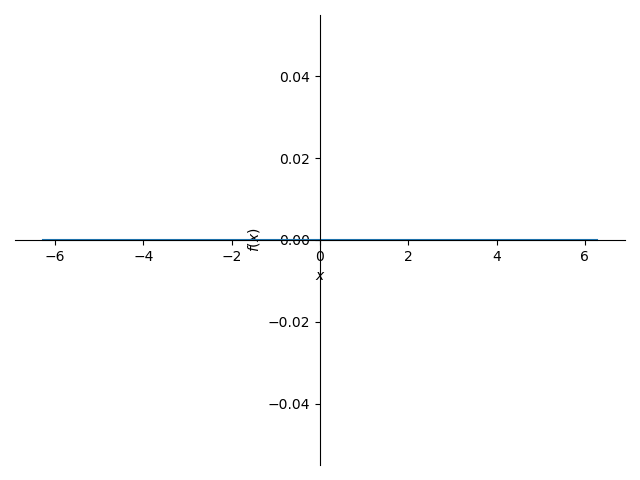

In [8]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
p1 = sym.plot(x, (t, -2*np.pi, 2*np.pi))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$X(j\omega)$')
ax.set_xlabel(r'$\omega$')
ax.arrow(3,0,0,np.pi-0.1, width=0.03, head_width = 0.2, head_length=0.1)
ax.arrow(-3,0,0,np.pi-0.1, width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-0.1,4)
fig.canvas.draw_idle()

---

## Outras propriedades da transformada de Fourier



### Convolução

Se $\mathcal{F}(x_1[n]) = X_1(e^{j\omega})$ e$\mathcal{F}(x_2[n]) = X_2(e^{j\omega})$, 

então

$\boxed{\mathcal{F}(x_1[n]*x_2[n]) = X_1(e^{j\omega})X_2(e^{j\omega})}$


### Multiplicação

Se $\mathcal{F}(x_1[n]) = X_1(e^{j\omega})$ e $\mathcal{F}(x_2[n]) = X_2(e^{j\omega})$, 

então:

$\boxed{\mathcal{F}(x_1[n]x_2[n]) = \frac{1}{2\pi}X_1(j\omega)*X_2(j\omega)}$

### Atraso

Se $\mathcal{F}(x[n]) = X(e^{j\omega})$, então

$\boxed{\mathcal{F}(x[n-n_0]} = X(e^{j\omega})e^{-j\omega n_0}$

### Multiplicação por $n$

Se $\mathcal{F}(x[n]) = X(e^{j\omega})$, então

$\boxed{\mathcal{F}\left(nx[n]\right)=j\frac{dX(e^{j\omega})}{d\omega}}$

---

### Exemplo 6

Vamos calcular o espectro de:

$x[n] = n\mathrm{rect}\left[\frac{n}{N}\right]$

Nós sabemos, do exemplo 3, que o pulso retangular tem a seguinte transformada de Fourier:

$X_1(j\omega) = \frac{\mathrm{sen}(\frac{\omega (2N+1)}{2})}{\mathrm{sen}(\frac{\omega}{2})}$

Então, pela propriedade da multiplicação por $n$, a transformada de Fourier de $x[n]$ é

$X(e^{j\omega}) = j\left(\frac{\frac{(2N+1)}{2}\cos\left(\frac{\omega (2N+1)}{2}\right)\mathrm{sen}\left(\frac{\omega}{2}\right)-\frac{1}{2}\mathrm{sen}\left(\frac{\omega (2N+1)}{2}\right)\cos\left(\frac{\omega}{2}\right)}{\mathrm{sen}^2\left(\frac{\omega}{2}\right)}\right)$



## Tabela  de transformada de Fourier de alguns sinais

|$$\bf{x[n]}$$                        | $$\bf{X(e^{j\omega})}$$                                                          |
|-------------------------------------|------------------------------------------------------------------------|
|$\delta[n]$                          | 1                                                                      |
|$\delta[n-n_0]$              | $e^{-j\omega n_0}$                               |
|$u[n]$                 | $\frac{e^{j\omega}}{e^{j\omega}-1}+\displaystyle\sum_{k=-\infty}^\infty\pi\delta(\omega-2\pi k)$  
|$a^nu[n]$ , com $|a|<1$           | $\frac{e^{j\omega}}{e^{j\omega}-a}$ |
|$a^nu[-n-1]$, com $|a|<1$            | $\frac{ae^{j\omega}}{1-ae^{j\omega}}$                         |
|$\cos(\omega_0n)$ |$\pi\displaystyle\sum_{k=-\infty}^\infty\delta(\omega-\omega_0-2\pi k)+\pi\displaystyle\sum_{k=-\infty}^\infty\delta(\omega+\omega_0-2\pi k)$                               |
|$\mathrm{sen}(\omega_0 n)$ |$\frac{\pi}{j}\displaystyle\sum_{k=-\infty}^\infty\delta(\omega-\omega_0-2\pi k)-\frac{\pi}{j}\displaystyle\sum_{k=-\infty}^\infty\delta(\omega+\omega_0-2\pi k)$                             |
|1    | $2\pi\displaystyle\sum_{k=-\infty}^\infty\delta(\omega-2\pi k)$                  |
|$\frac{\mathrm{sen}(\omega_0n)}{\pi n}$                | $H(e^{j\omega}) = \left\{\begin{array}{cc}1 &, |\omega|<\omega_0 \\ 0 & , \omega_0\leq|\omega|<\pi \\ H(e^{j(\omega-2\pi)})&,\forall \omega\end{array}\right.$                        |
|$\mathrm{rect}\left[\frac{n}{N}\right]$| $\frac{\mathrm{sen}(\frac{\omega (2N+1)}{2})}{\mathrm{sen}(\frac{\omega}{2})}$                        |
|$e^{j\omega_0 n}$    | $\pi\displaystyle\sum_{k=-\infty}^\infty\delta(\omega-\omega_0-2\pi k)$                  |



## Transformada de Fourier de sinais periódicos

Como já visto anteriormente, um sinal periódico, com período fundamental $T_0$, pode ser escrito como uma série de Fourier:

$x[n] = \displaystyle\sum_{k=<T_0>} c_ke^{jk\frac{2\pi}{T_0} n}$

Como já visto anteriormente, a transformada de Fourier de $e^{jk\omega_0 n}$ é $\displaystyle\sum_{m=-\infty}^{\infty}\pi\delta(\omega-\omega_0-2\pi m)$. Então, a transformada de Fourier de um sinal periódico é um trem de impulsos com áreas correspondentes aos coeficientes da série de Fourier:

$X(e^{j\omega}) = \displaystyle\sum_{m=-\infty}^{\infty}\sum_{k=<T_0>} c_k\pi\delta(\omega-k\omega_0-2\pi m)$






---

### Exemplo 7

Vamos calcular a transformada de Fourier de tempo discreto da onda quadrada vista abaixo:





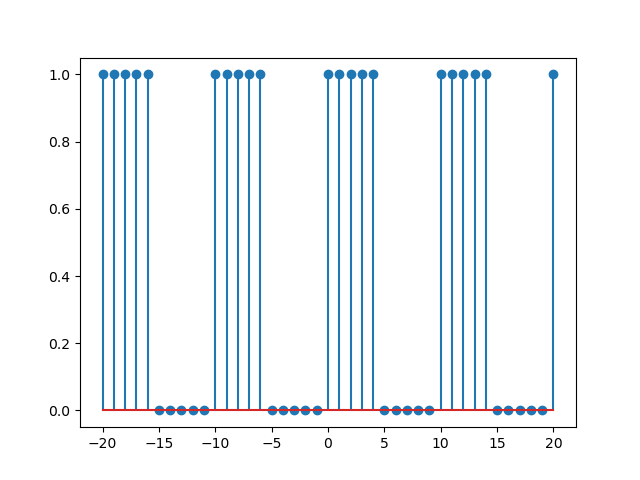

In [9]:
n = np.arange(-20,21)
x = np.zeros(len(n))
x[0:5] = 1
x[10:15] = 1
x[20:25] = 1
x[30:35] = 1
x[-1] = 1
plt.figure()
plt.stem(n,x)
plt.show()

Como já visto anteriormente, a série de Fourier desse sinal é:

$c_w = \frac{1}{10}\left(\frac{\mathrm{sen}(\frac{w\pi}{2})}{\mathrm{sen}(\frac{w\pi}{10})}\right)e^{j\frac{-2w\pi}{5}}$, para $w\neq 0, \pm 10, \pm 20, ...$

e $c_w = 0.5$, para $w=0, \pm 10, \pm 20, ...$.

e $T_0 = 10$.

Então, a transformada de Fourier desse sinal é:

$X(j\omega) = \displaystyle\sum_{m=-\infty}^{\infty}\left[\pi\delta(\omega-2\pi m) + \sum_{k=1}^9 \frac{\pi}{10}\left(\frac{\mathrm{sen}(\frac{k\pi}{2})}{\mathrm{sen}(\frac{k\pi}{10})}\right)e^{j\frac{-2k\pi}{5}}\delta\left(\omega-k\frac{\pi}{5}-2\pi m\right)\right]$

O gráfico do módulo e da fase do espectro do sinal está mostrado abaixo:

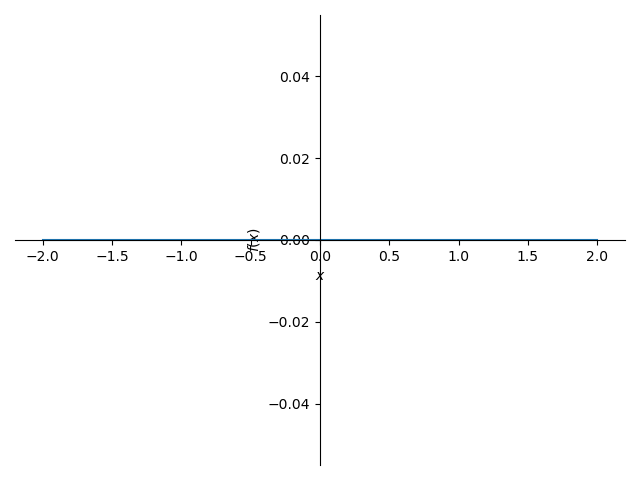

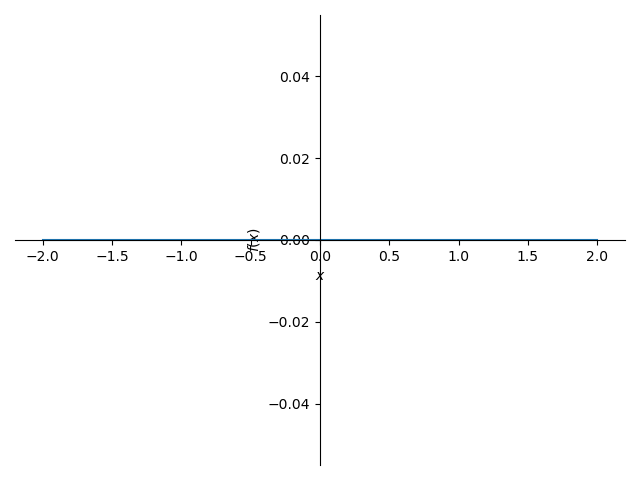

In [10]:
omega = sym.symbols('\omega')
x = sym.Piecewise((0, True))
y = sym.symbols('y')

p1 = sym.plot(x, (t, -2, 2))
fig = p1._backend.fig
ax = p1._backend.ax[0]
p2 = sym.plot(x, (t, -2, 2))
fig = p2._backend.fig
ax2 = p2._backend.ax[0]

ax.set_ylabel(r'$|X(e^{j\omega})|$')
ax.set_xlabel(r'$\omega$')
ax2.set_ylabel(r'$\angle{X(e^{j\omega})}$')
ax2.set_xlabel(r'$\omega$')

for i in range(-10,11):
    if i == 0:
        ax.arrow(i,0,0,np.pi-0.1, width=0.03, head_width=0.2, head_length=0.1)
    else:
        if np.abs(np.pi/10*np.sin(i*np.pi/2)/np.sin(i*np.pi/10))>0.001:
            ax.arrow(i*2*np.pi/10,0,0,np.abs(np.pi/10*np.sin(i*np.pi/2)/np.sin(i*np.pi/10)), width=0.03, head_width=0.2, head_length=0.1)
            ax2.arrow(i*2*np.pi/10,0,0,(np.sign(np.abs(np.pi/10*np.sin(i*np.pi/2)/np.sin(i*np.pi/10)))*np.pi-2*i*np.pi/5)%(2*np.pi)-np.pi, width=0.03, head_width = 0, head_length=0)

plt.ylim(-4,4)
fig.canvas.draw_idle()


---


---

### Exemplo 8

Vamos agora analisar a resposta em frequência de um filtro passa-baixas com a seguinte resposta ao impulso:

$h[n]= \frac{1}{5}(x[n]+x[n-1]+x[n-2]+x[n-3]+x[n-4])$

Esse filtro é muito utilizado na prática e é conhecido como **média-móvel**. Nesse exemplo em específico é uma média-móvel de tamanho 5.

Pode se observar que essa resposta ao impulso é um pulso retangular, de tamanho 5 e deslocado de 2 instantes. Então, a sua transformada de Fourier é:

$H(e^{j\omega}) = \frac{1}{5}\frac{\mathrm{sen}\left(\frac{5}{2}\omega\right)}{\mathrm{sen}\left(\frac{1}{2}\omega\right)}e^{-j2\omega}$



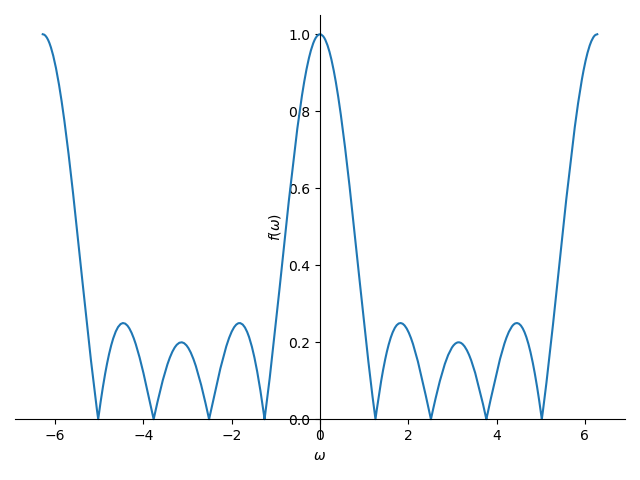

In [11]:
omega = sym.symbols('\omega')
H = 0.2*sym.sin(2.5*omega)/sym.sin(0.5*omega)*sym.exp(-sym.I*2*omega)
sym.plot(sym.Abs(H), (omega, -2*np.pi,2*np.pi))

## Teorema de Parseval

Assim como a série de Fourier, a transformada de Fourier tem uma propriedade equivalente, que diz que a energia de um sinal é igual à integral do quadrado do módulo da sua transformada de Fourier.

$\displaystyle\sum_{n=-\infty}^\infty |x[n]|^2=\frac{1}{2\pi}\int_{-\pi}^\pi |X(e^{j\omega})|^2\,d\omega$

A sua demonstração fica como exercício.

## Exercícios

**1)** Calcule as transformadas de Fourier dos seguintes sinais:

a)


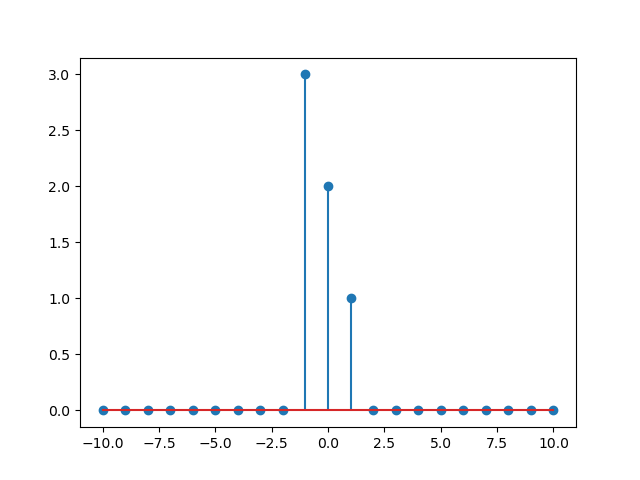

In [12]:
n = np.arange(-10,11)
x = np.zeros(len(n))
x[9:12] = [3,2, 1]
plt.figure()
plt.stem(n, x)
plt.show()

b)

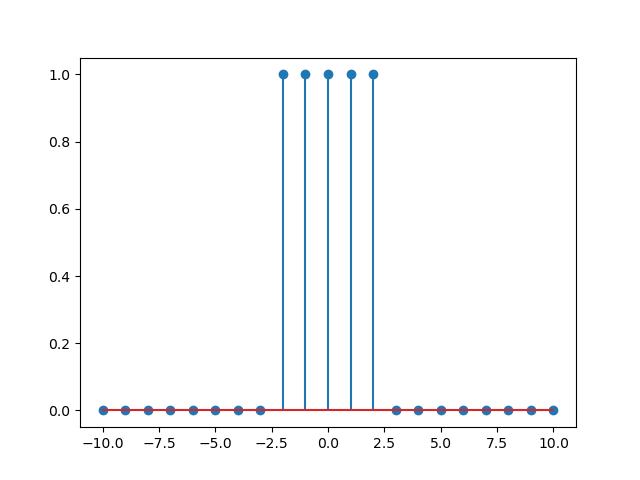

In [13]:
n = np.arange(-10,11)
x = np.zeros(len(n))
x[8:13] = [1,1, 1, 1,1]
plt.figure()
plt.stem(n, x)
plt.show()

c) 

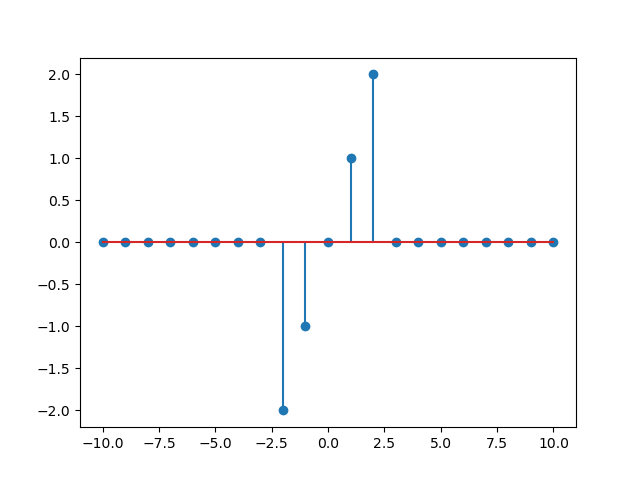

In [14]:
n = np.arange(-10,11)
x = np.zeros(len(n))
x[8:13] = [1,1, 1, 1,1]
plt.figure()
plt.stem(n, n*x)
plt.show()

**2)** Faça a transformada inversa de Fourier dos seguintes espectros. As expressões abaixo são válidas para $-\pi<\omega<pi$.

a) $X_1(e^{j\omega})=e^{j2\omega}$

b) $X_2(e^{j\omega})=\cos(2\omega)$

c) $X_3(e^{j\omega})=\cos^2(\frac{\omega}{2})$

d) $X_3(e^{j\omega})=\pi(\delta(\omega-1)+\delta(\omega+1))$

**3)** Faça a transformada inversa de Fourier dos espectros abaixo:

a)

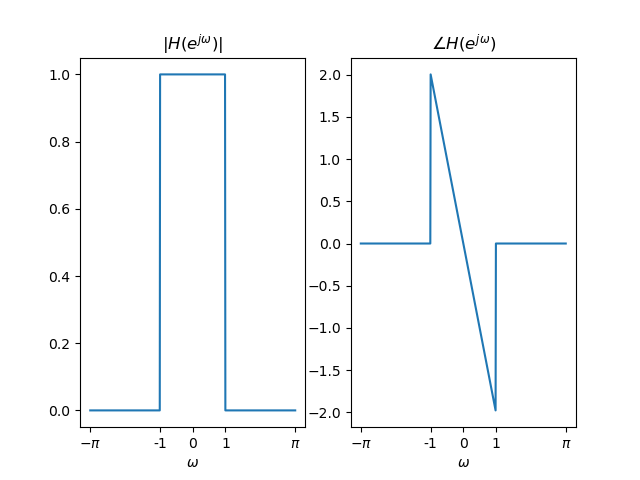

In [26]:
omega = np.arange(-np.pi,np.pi,0.01)
Habs = np.zeros(len(omega))
Habs[int(len(omega)//2-1/0.01):int(len(omega)//2+1/0.01)]=1
Hfase = Habs*(-2*omega)
plt.figure()
plt.subplot(1,2,1)
plt.plot(omega, Habs)
plt.xticks([-np.pi, -1,0, 1, np.pi], ['$-\pi$','-1','0','1', '$\pi$'])
plt.title(r'$|H(e^{j\omega})|$')
plt.xlabel(r'$\omega$')
plt.subplot(1,2,2)
plt.plot(omega, Hfase)
plt.xticks([-np.pi, -1,0, 1, np.pi], ['$-\pi$','-1','0','1', '$\pi$'])
plt.title(r'$\angle H(e^{j\omega})$')
plt.xlabel(r'$\omega$')
plt.show()

b)

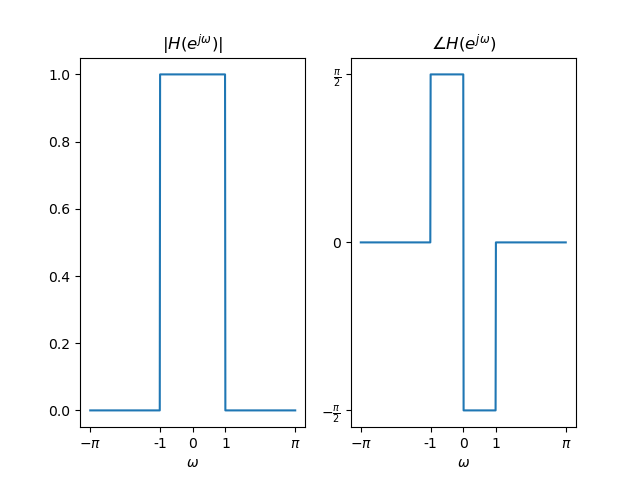

In [30]:
omega = np.arange(-np.pi,np.pi,0.01)
Habs = np.zeros(len(omega))
Habs[int(len(omega)//2-1/0.01):int(len(omega)//2+1/0.01)]=1
Hfase = Habs*(-np.pi/2*np.sign(omega))
plt.figure()
plt.subplot(1,2,1)
plt.plot(omega, Habs)
plt.xticks([-np.pi, -1,0, 1, np.pi], ['$-\pi$','-1','0','1', '$\pi$'])
plt.title(r'$|H(e^{j\omega})|$')
plt.xlabel(r'$\omega$')
plt.subplot(1,2,2)
plt.plot(omega, Hfase)
plt.xticks([-np.pi, -1,0, 1, np.pi], ['$-\pi$','-1','0','1', '$\pi$'])
plt.yticks([-np.pi/2,0, np.pi/2], [r'$-\frac{\pi}{2}$','0',r'$\frac{\pi}{2}$'])
plt.title(r'$\angle H(e^{j\omega})$')
plt.xlabel(r'$\omega$')
plt.show()

**4)** As seguintes expressões, são expressões válidas para transformadas de Fourier de tempo discreto? Justifique a resposta.

a) $\omega+\pi$

b) $j+\pi$

c) $\mathrm{sen}(10\omega)$

d) $\mathrm{sen}(\frac{\omega}{10})$

e) $\delta(\omega)$

**5)** Faça a transformada de Fourier de tempo discreto dos seguintes sinais:

a) $x_1[n] = u[n]-u[n-9]$

b) $x_2[n] = a^{n-m}u[n-m]$

c) $x_3[n] = n^2a^nu[n]$



**6)** Considere um filtro passa baixa com a seguinte equação de diferenças:

$y[n] = b_0x[n]+b_1x[n-1]+b_2x[n-2]+b_3x[n-3]$

Determine a resposta em frequência e a frequência de corte (a frequência na qual o ganho é $1/\sqrt{2}$ do ganho máximo) desse filtro para os seguintes valores dos coeficientes:


a)$b_0= b_3=0$, $b_1=b_2$

b) $b_1=b_2=0, b_0=b_3$

c) $b_0=b_1=b_2=b_3$

d) $b_0=b_1, b_2=b_3=0$

e) $b_0=-b_1=b_2=-b_3$

**7)** Um sistema acumulador a seguinte equação de diferenças:

$y[n] = \displaystyle\sum_{k=-\infty}^nx[n]$

a) Obtenha a sua resposta ao impulso.

b) Obtenha a sua resposta em frequência

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
